<a href="https://colab.research.google.com/github/andresem/VolatilityForecasting/blob/main/VolatilityForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Volatility forecasting and liquidity: Evidence from individual stocks**
### Authors: *Peter Brous*, *Ufuk Ince* and *Ivilina Popova*
### Python implementation by *Andrés Felipe Echavarría Molina*

The objective of this code is to implement the methodology purposed by the authors to measure the volatility through historical methods and volatility implied methods.

In this document we will analyze the efficiency of the methods for main indexes of different countries.

All credits to the authors for their excellent job.

The article is avalible in:

https://link.springer.com/article/10.1057/jdhf.2009.17 

First we load the 2 years historical data for 6 indexes.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

brazil_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Brazil%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
colombia_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Colombia%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
nasdaq_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/Nasdaq%20100%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
mexico_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Mexico%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
south_africa_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20South%20Africa%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
canada_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Canada%20Historical%20Data.csv', 
                            sep = ',', index_col = 0) 

dataframes = [brazil_data, colombia_data, nasdaq_data, mexico_data, south_africa_data, canada_data]

for i in range(len(dataframes)):
  dataframes[i].index = pd.to_datetime(dataframes[i].index)
  dataframes[i] = dataframes[i].iloc[::-1]

print(dataframes[0].info())
dataframes[0].tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2019-05-27 to 2021-06-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   544 non-null    float64
 1   Open    544 non-null    float64
 2   High    544 non-null    float64
 3   Low     544 non-null    float64
dtypes: float64(4)
memory usage: 21.2 KB
None


,Price,Open,High,Low
Date,,,,
2021-06-14,2061.03,2041.17,2078.07,2040.76
2021-06-15,2049.54,2052.42,2066.90,2032.74
2021-06-16,2058.25,2061.10,2080.15,2018.85
2021-06-17,2034.67,2037.67,2068.12,2024.67
2021-06-18,2038.90,2044.07,2055.85,2007.66
2021-06-21,2049.73,2032.66,2060.15,2025.90
2021-06-22,2055.36,2050.53,2077.61,2031.05
2021-06-23,2071.86,2084.54,2105.77,2065.48
2021-06-24,2097.71,2087.03,2110.26,2080.80


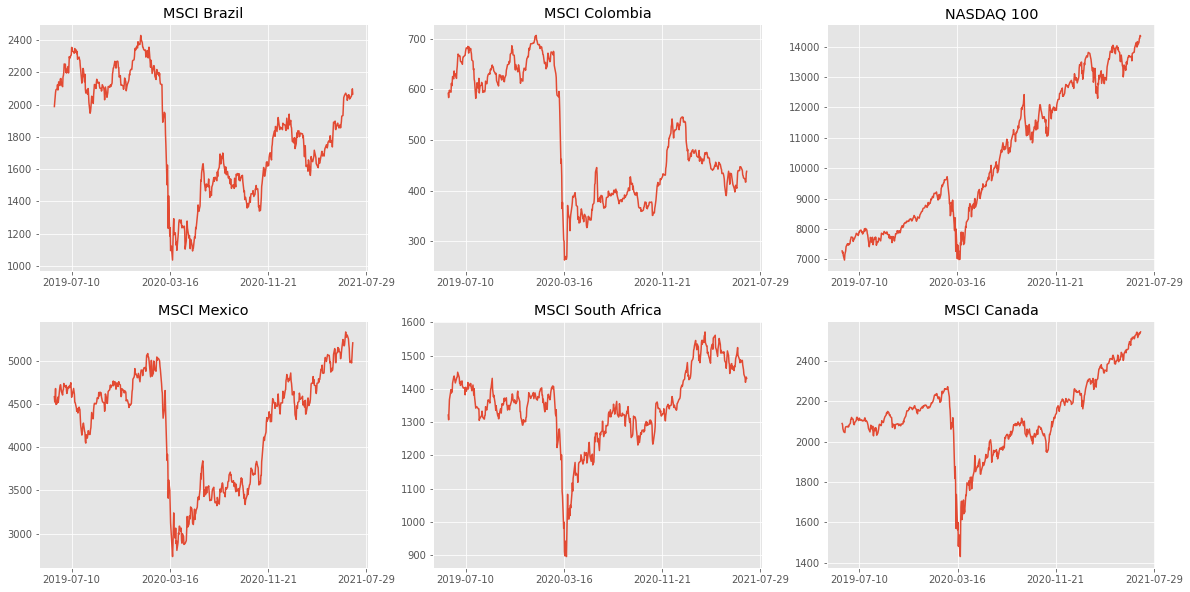

In [6]:
fig, axs = plt.subplots(2, 3)
locator = MaxNLocator(nbins = 4)
names = ['MSCI Brazil', 'MSCI Colombia', 'NASDAQ 100', 'MSCI Mexico', 'MSCI South Africa', 'MSCI Canada']

for i in range(len(names)):
  axs.reshape(-1)[i].plot(dataframes[i]['Price'])
  axs.reshape(-1)[i].set_title(names[i])
  axs.reshape(-1)[i].xaxis.set_major_locator(locator)

plt.show()

The authors purposes 5 different methods to measure volatility, 4 of them are for historical volatility and the last one is to measure the implied volatility.
The volatility forecast measures are compared with a measure of realized volatility $(RE)$ for $n$ trading days, the formula that describes this $RE$ is:

## <center> $RE(n)_{t} = \sqrt{\cfrac{252}{n-1} \sum^{n-1}_{j=0}  \bigg{[} r_{t-j} -\bigg{(}\cfrac{\sum^{n-1}_{j=0} r_{t-j}} {n} \bigg{)} \bigg{]}^2}$</center>

and $r_{t}$ is the logarithmic return described as:

## <center> $r_{t} = \ln{\cfrac{C_{t}}{C_{t-1}}} $ <center>

Where $C_{t}$ is the closing price at period t.

In [7]:
from math import sqrt
import numpy as np
pd.options.mode.chained_assignment = None

def log_return(data):
  return np.log(data.Price) - np.log(data.Price.shift(1))

def realized_volatility(data, n):
  volatilities = []
  returns = log_return(data).dropna()
  for local_returns in returns.rolling(window = n):
    volatilities.append(sqrt(252/(n-1)*sum((local_returns - local_returns.mean())**2)))
  return pd.Series(volatilities[n-1:], index = returns[n-1:].index)

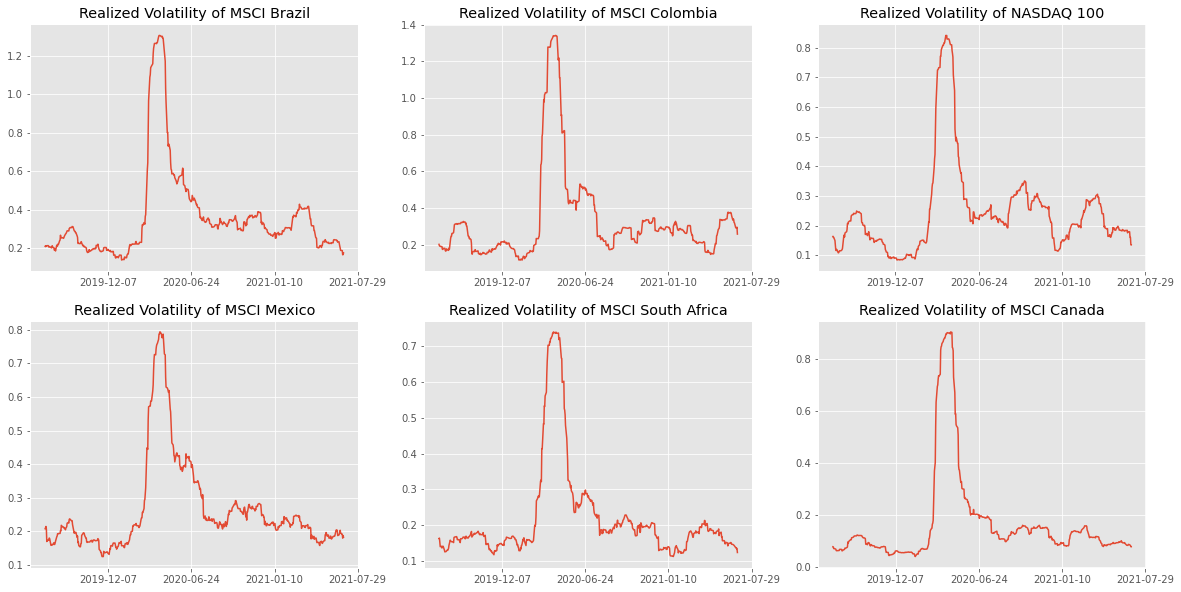

In [17]:
fig, axs = plt.subplots(2, 3)

for i in range(len(names)):
  axs.reshape(-1)[i].plot(realized_volatility(dataframes[i], 30))
  axs.reshape(-1)[i].set_title('Realized Volatility of ' + names[i])
  axs.reshape(-1)[i].xaxis.set_major_locator(locator)

plt.show()


The methods purposed to measure the historical volatility are:

* ###  **Historical Standard Deviation**
## <center> $SD(n)_{t} = \sqrt{\cfrac{252}{n-1} \sum^{n-1}_{j=0}  \bigg{[} r_{t-j} -\bigg{(}\cfrac{\sum^{n-1}_{j=0} r_{t-j}} {n} \bigg{)} \bigg{]}^2}$ </center>
<br> 
* ### **Annualized Median Absolute Deviation**
## <center> $AMAD(n)_{t} = \sqrt{\cfrac{252 \pi}{2} \cfrac{1}{n}} \sum^{n-1}_{j=0} \Bigg| r_{t-j} - \cfrac{\sum^{n-1}_{j = 0} r_{t-j}}{n} \Bigg|$ </center>
<br> 
* ### **Parkinson's Extreme Value Estimator**
## <center> $PEVE(n)_{t} = \sqrt{\cfrac{252}{n} \, \displaystyle \sum^{n-1}_{j=0} \cfrac{1}{4 \ln2} \bigg( \ln \cfrac{H_{t-j}}{L_{t-j}} \bigg)^2}$ </center>

  Where $H_{t-j}$ is the higher price of day and $L_{t-j}$  the lower.
<br><br>

* ### **Garman and Klass's Composite Extreme Value Estimator**
## <center> $GKEV(n)_{t} = \sqrt{\cfrac{252}{n} \, \Bigg[ \bigg( \ln \cfrac{O_{t}}{C_{t-1}} \bigg)^2 + \cfrac{1}{2} \bigg( \ln \cfrac{H_{t}}{L_{t}} \bigg)^2 - (2 \ln 2 - 1) \bigg( \ln \cfrac{C_{t}}{O_{t}} \bigg)^2} \Bigg]$</center>

Where $O_{t}$ denotes the daily open price.
<br><br>

The implied volatility model used is:

* ### **Volume Weighted Implied Volatility**
## <center> $\sigma_{T_{i}} = \displaystyle \sum^{N^{T_{i}}}_{j=1} \cfrac{Volume^{T_{i}}_{j} \; \sigma^{T_{i}}_{j}}{Volume}$ </center>